In [26]:
import pandas as pd
import japanize_matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

0. g:1, pattern:2, 7
1. g:1, pattern:2, 8
2. g:1, pattern:3, 7
3. g:1, pattern:3, 8
4. g:2, pattern:2, 7
5. g:2, pattern:2, 8
6. g:2, pattern:3, 7
7. g:2, pattern:3, 8
8. g:3, pattern:2, 7
9. g:3, pattern:2, 8
10. g:3, pattern:3, 7
11. g:3, pattern:3, 8
12


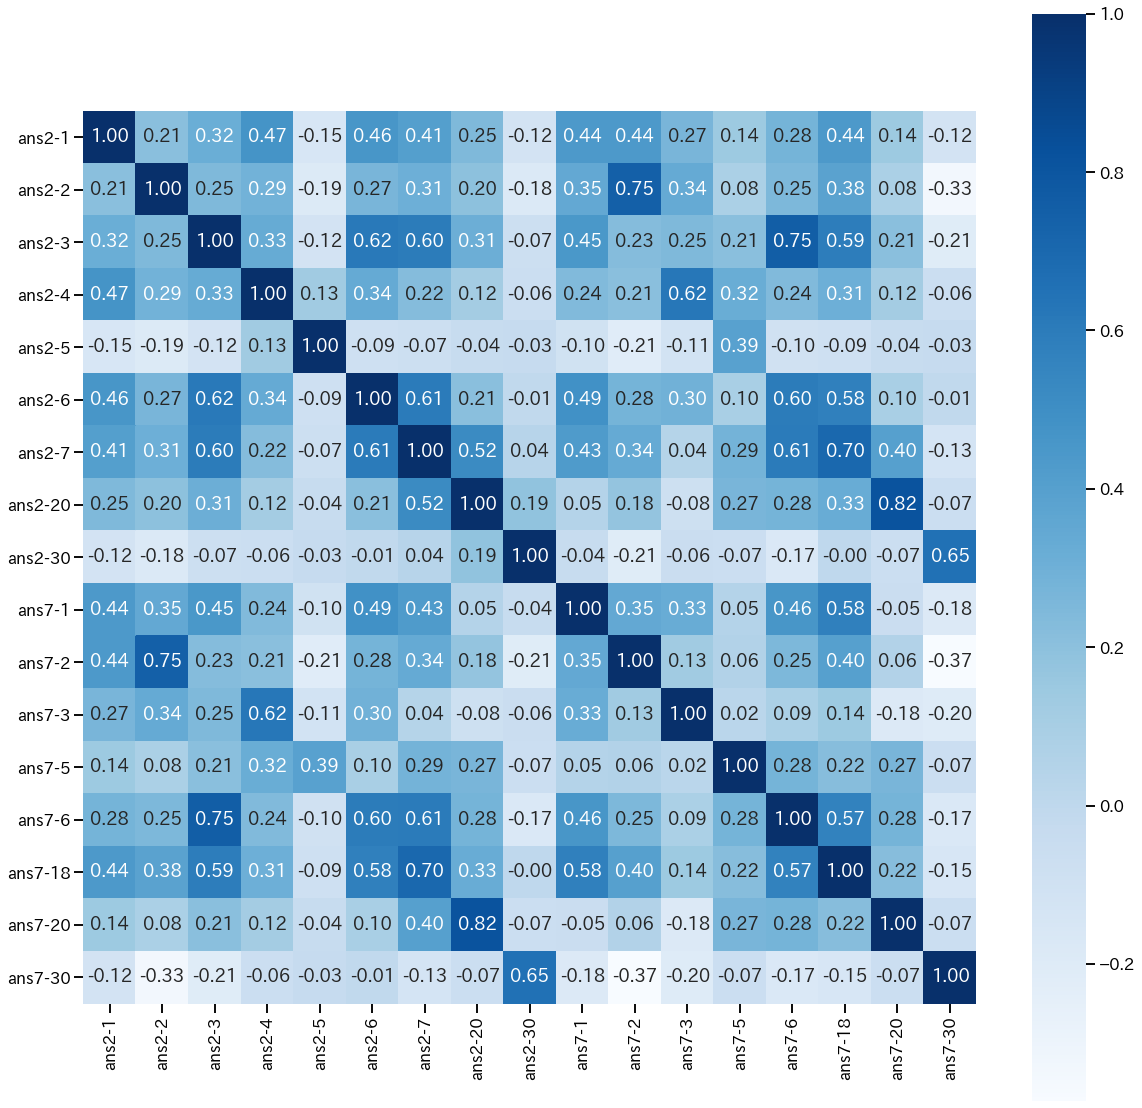

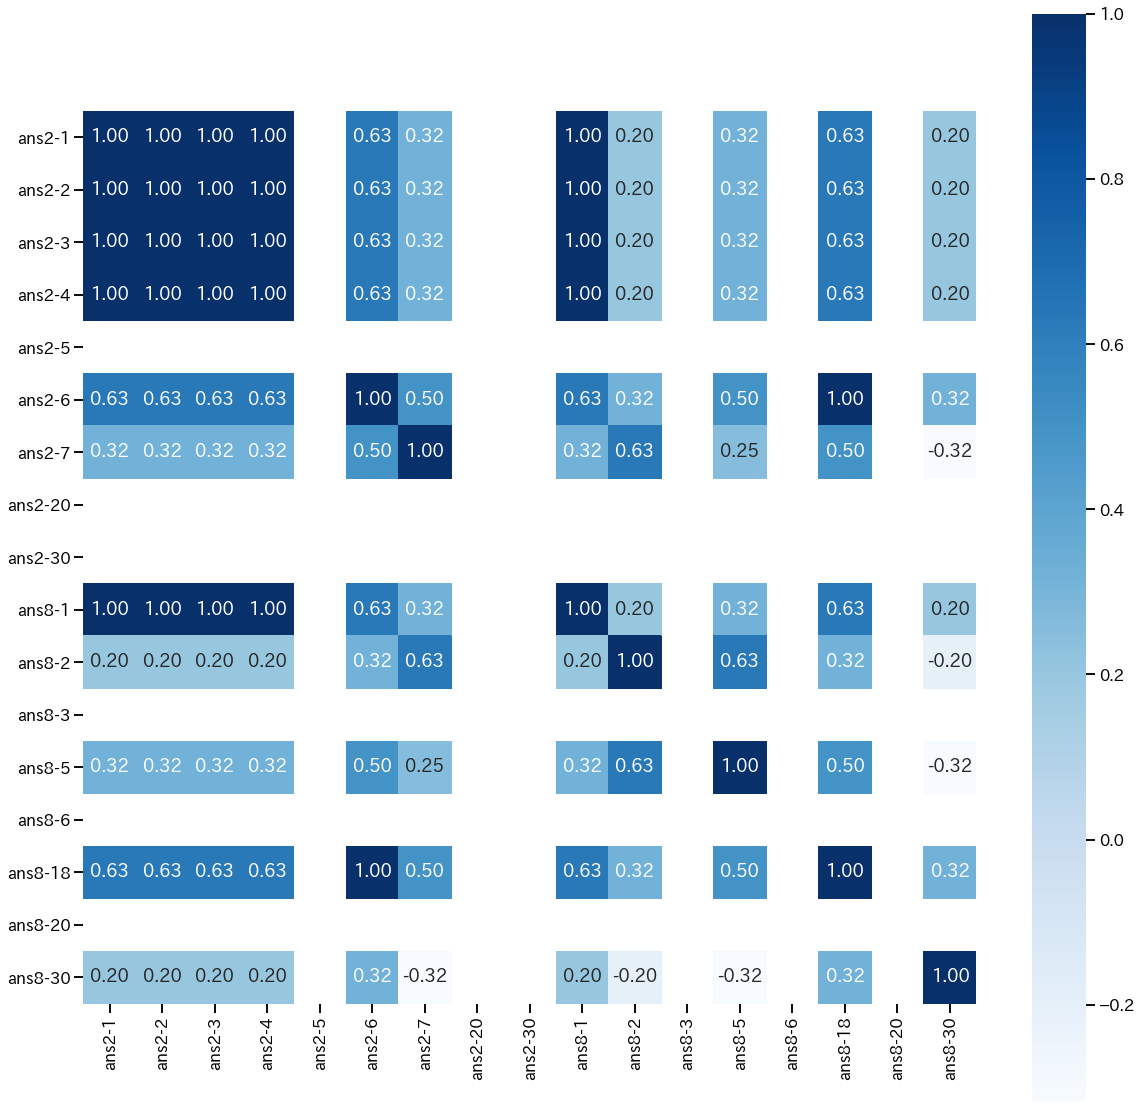

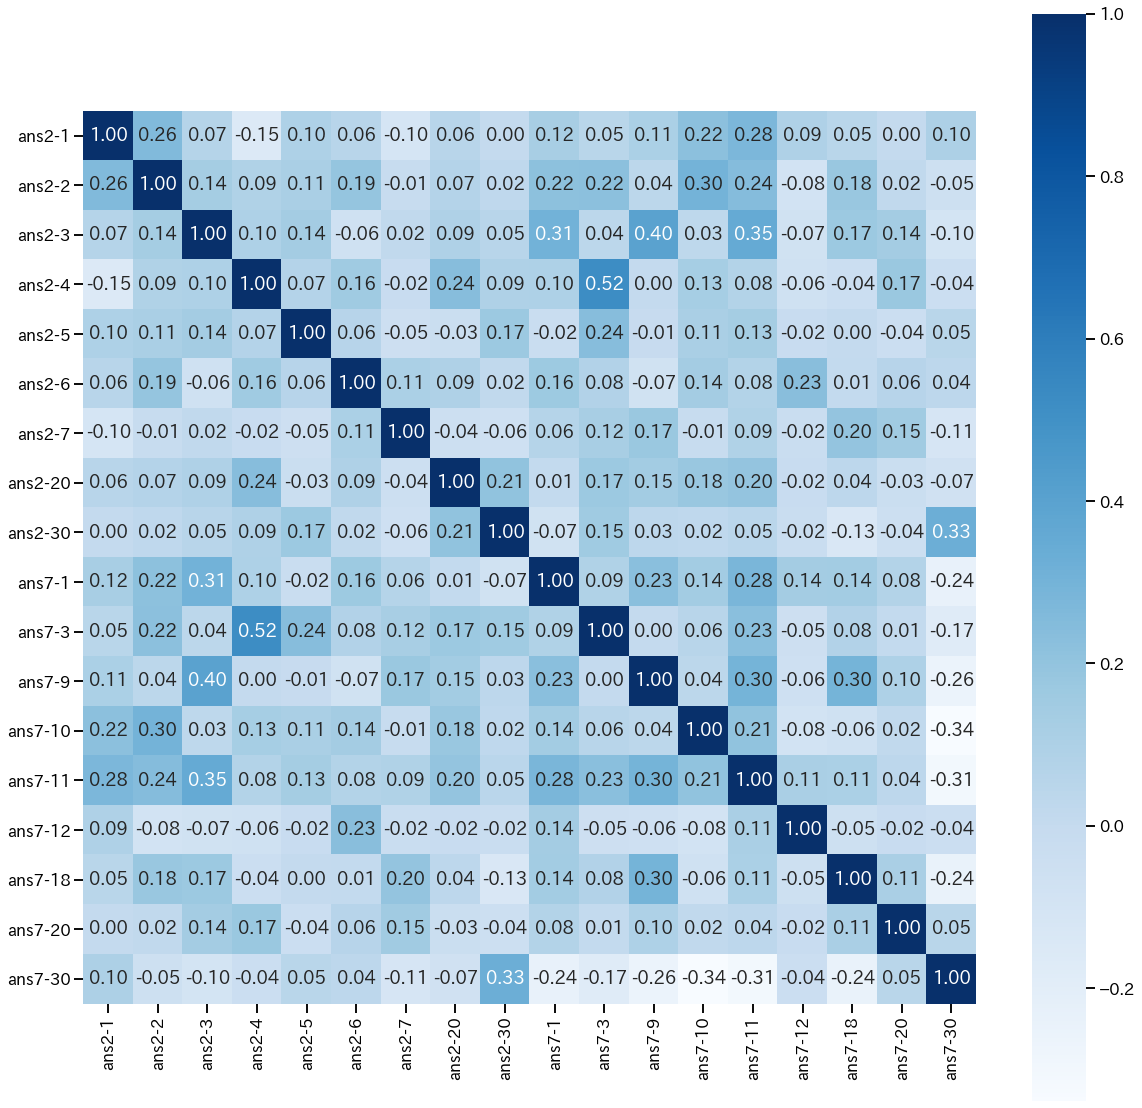

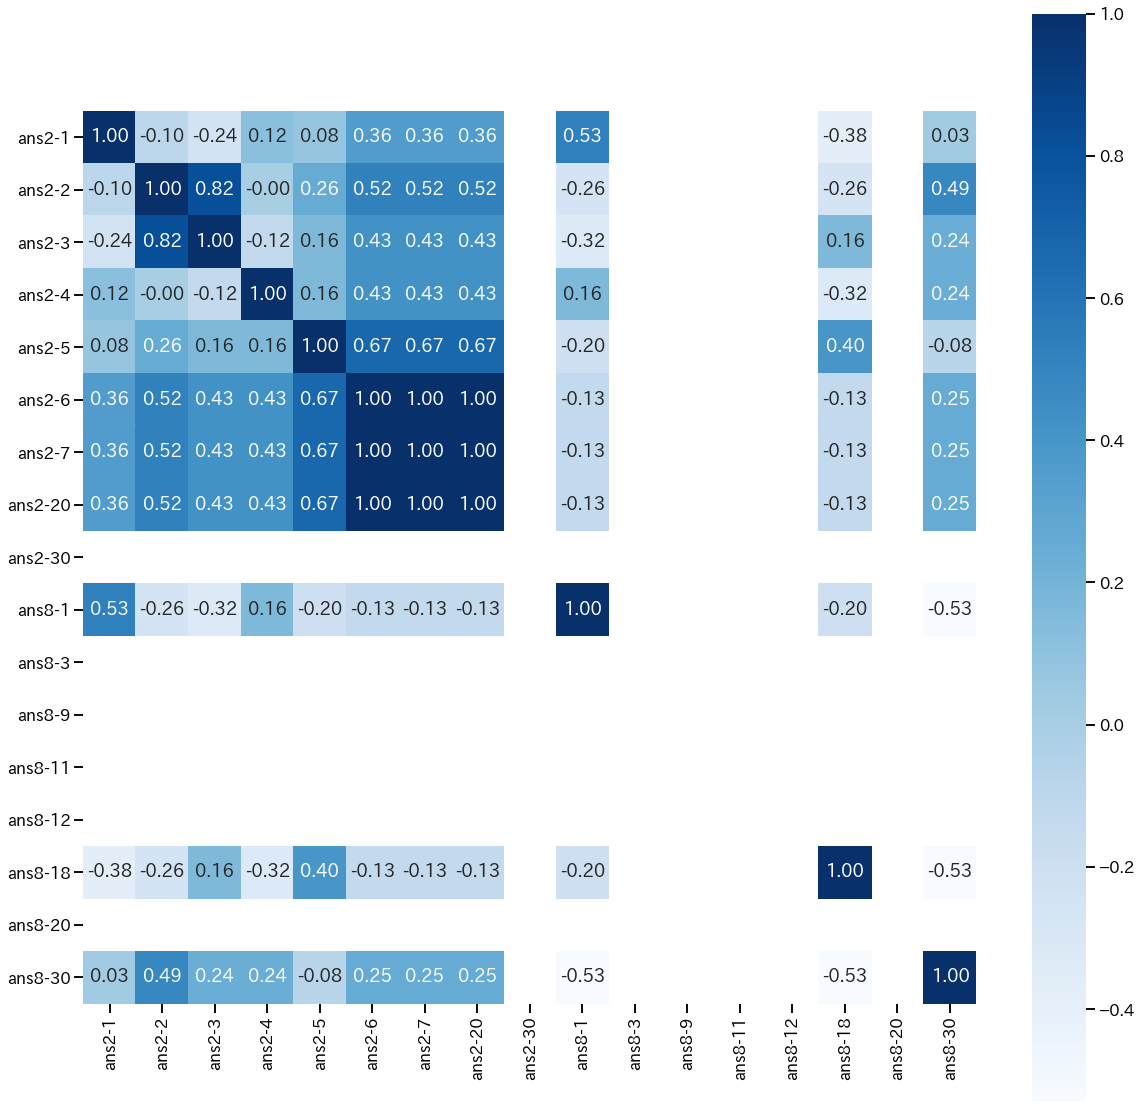

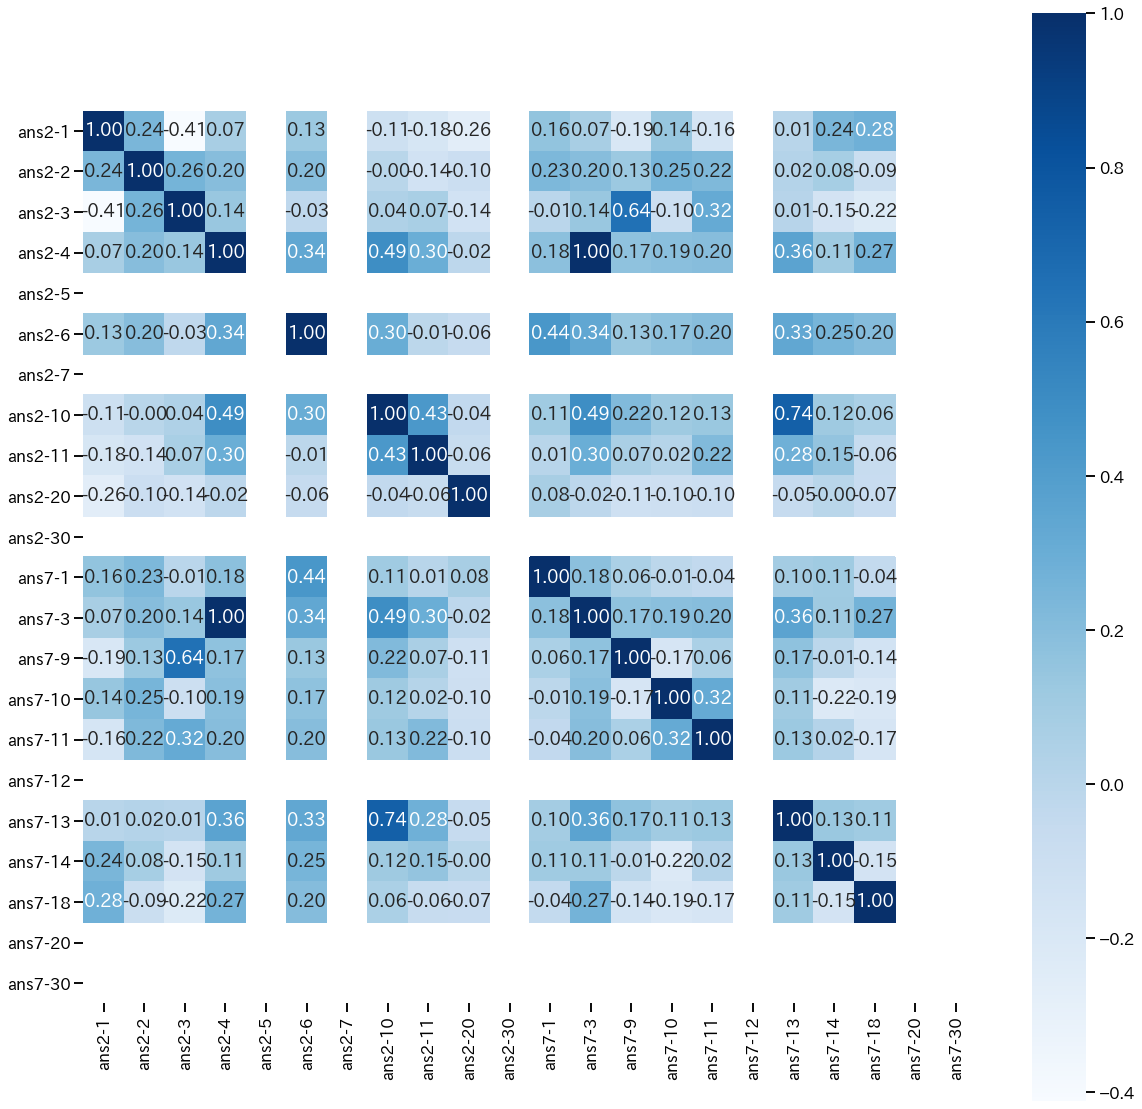

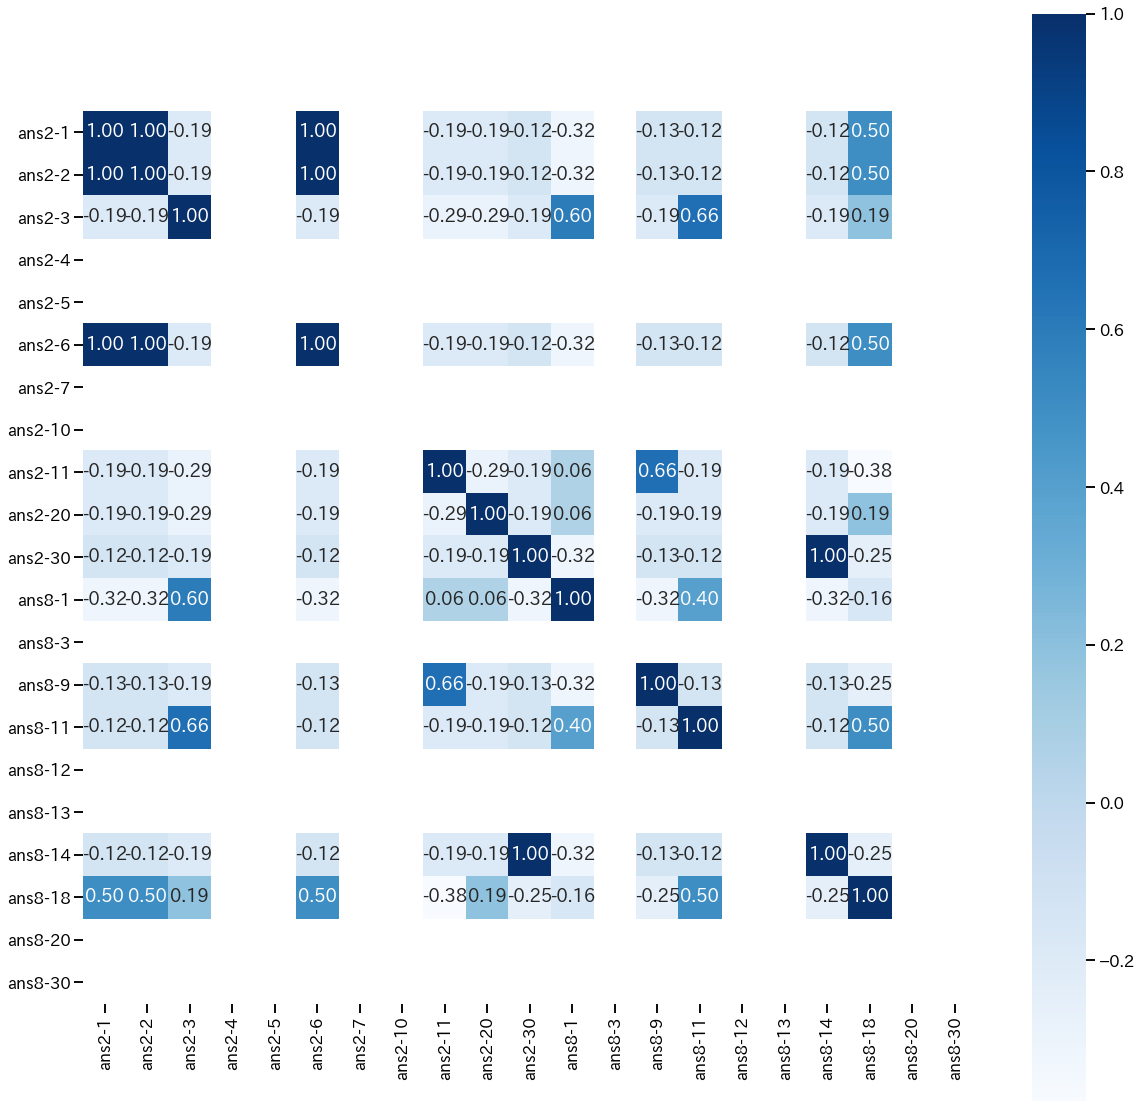

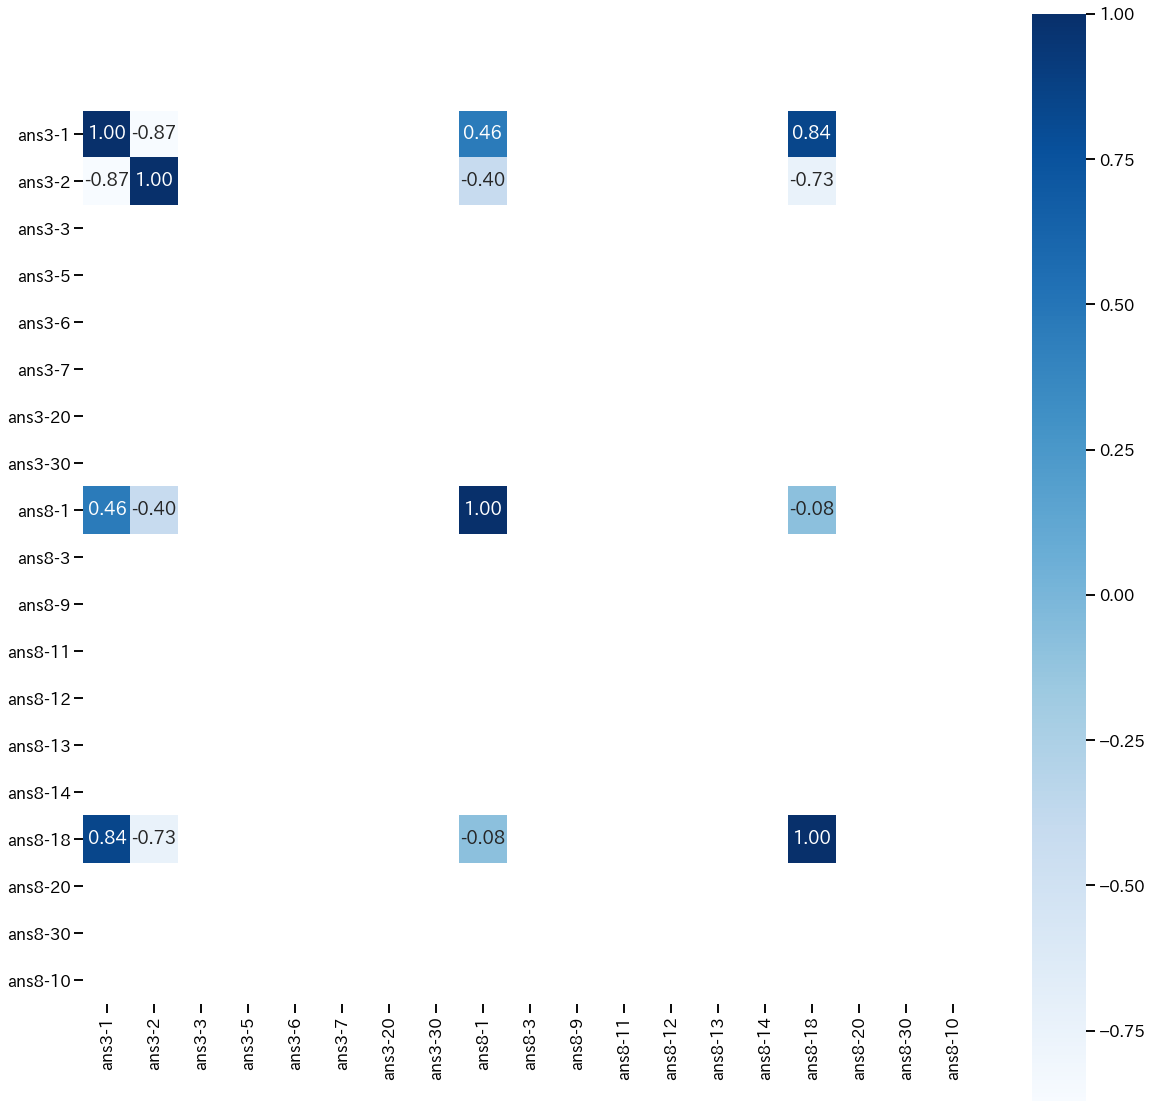

In [27]:
grades = [1, 2, 3] # 学年
question_numbers = [2, 3, 7, 8] # 設問番号
question_patterns = [ [2,7], [2,8], [3,7], [3,8]] # 回答パターン

# 記録用ファイル名の生成
file_list = list()
corr_list = list()
hmap_list = list()
num = 0
for grade in grades:
    for q_pattern in question_patterns:
        print(str(num)+". g:"+str(grade)+", pattern:"+str(q_pattern[0])+", "+str(q_pattern[1]))
        file_list.append("data/prog_data2022_g"+str(grade)+"_ans"+str(q_pattern[0])+"-"+str(q_pattern[1])+".csv")
        corr_list.append("data/prog_corr2022_g"+str(grade)+"_ans"+str(q_pattern[0])+"-"+str(q_pattern[1])+".csv")
        hmap_list.append("data/prog_heatmap2022_g"+str(grade)+"_ans"+str(q_pattern[0])+"-"+str(q_pattern[1])+".png")
        num += 1
             
def main():
    # mongodbから取得したデータをdf形式に変換し、出力したcsvファイルをdf形式で読み込み
    # unnamed:0が出ないようにindex_col=0で対処
    df_list = list()     # データフレームのリスト作成
    print(num)
    for n in range(num):
        #print(file_list[n])
        df = pd.read_csv(file_list[n], index_col=0)
        df_list.append(df)
        #print(len(df))
        #print(df_list[n])
        
        if len(df) >= 1:
            # result.course_user_idの相関係数は計算しないためDFから削除
            df_drop = df.drop(columns='result.course_user_id')
            #print(df_drop)

            # 相関係数の計算
            df_corr = df_drop.corr()
            #print(df_corr)

            # 作成したいグラフを下に記述してある関数で選んで書き換えてください
            Drow2(df_corr, n)

            # 相関係数の計算結果をcsvファイルとして出力
            # index=falseでunnamed:0を出力しないように設定できる。今回はreadのほうで指定したのでこちらは無し
            df_corr.to_csv(corr_list[n])


# heatmap数値無し デフォルト
def Drow(df):
    # 相関係数が高いほど色が白く、低いほど色が黒く表示
    sns.heatmap(df)
    # 先に保存しないと白い画像しか保存されないので順序に注意
    plt.savefig('heatmap.png')
    plt.show()


# heatmap数値ありversion
def Drow2(df, n):
    # 文字サイズの指定これ以外に4つある。これは上から2番目
    sns.set_context("talk")
    # キャンパスサイズ指定
    plt.figure(figsize=(20, 20))
    # annot 数値表示, fmt 小数点以下桁数, cmap カラー指定, square 正方形表示
    sns.heatmap(df, annot=True, fmt='.2f', cmap="Blues", square=True)
    plt.savefig(hmap_list[n])
    plt.show()
    plt.close('all')


# 各項目ごとの散布図
def Drow3(df):
    sns.pairplot(df)
    plt.savefig('scatter.png')
    plt.show()


if __name__ == '__main__':
    main()